In [157]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [139]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [140]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [141]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

In [142]:
print(X.shape)
print(y.shape)

(70000, 28, 28)
(70000,)


In [143]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [144]:
y[0]

5

In [145]:
def plot_input_img(i):
    plt.imshow(X[i], cmap='binary')
    plt.title(y[i])
    plt.show()

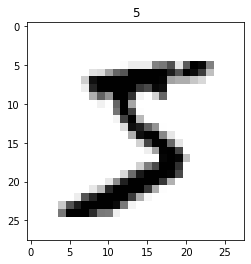

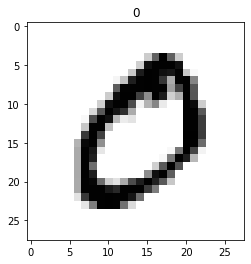

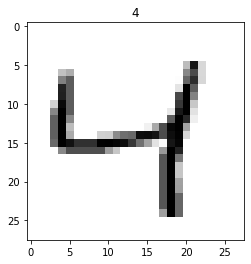

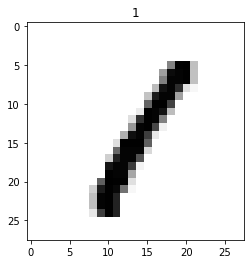

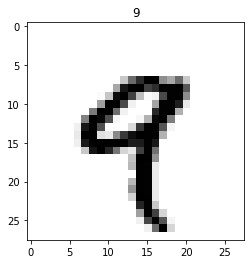

In [146]:
for i in range(5):
    plot_input_img(i)

In [147]:
#Pre process the images

# Normalizing the image to [0, 1] range
X_scaled = X.astype(np.float32)/255.

X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1] * X_scaled.shape[2]))

In [148]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_scaled, y, test_size=0.3, random_state=30)

In [149]:
X_train_std.shape, X_test_std.shape, y_train_std.shape, y_test_std.shape

((49000, 784), (21000, 784), (49000,), (21000,))

In [98]:
clf = svm.SVC(kernel='linear', degree=3, gamma='scale')
clf.fit(X_train_std, y_train_std)
print(clf.score(X_test_std, y_test_std))

0.9361428571428572


In [117]:
X_scaled.shape

(70000, 784)

In [118]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(70000, 154)

In [119]:
pca.explained_variance_ratio_

array([0.09746112, 0.07155451, 0.06149535, 0.05403381, 0.04888937,
       0.04305231, 0.03278258, 0.02889641, 0.02758363, 0.02342139,
       0.02106688, 0.02037553, 0.01707064, 0.0169402 , 0.01583383,
       0.01486347, 0.01319358, 0.01279015, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909634, 0.00883286,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585611, 0.00566753,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467593,
       0.00454368, 0.00444918, 0.00418216, 0.00396164, 0.00383708,
       0.00375784, 0.00361426, 0.00349024, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287102, 0.00282514,
       0.00269423, 0.00268393, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206318, 0.00202781, 0.00195035, 0.00191471, 0.00188549,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

In [120]:
pca.n_components_

154

In [121]:
X_pca

array([[ 0.4793832 , -1.2401373 , -0.20052026, ...,  0.13615324,
        -0.05578514,  0.0838608 ],
       [ 3.9626694 , -1.137125  ,  2.259298  , ...,  0.09363895,
        -0.02565836, -0.09765733],
       [-0.23141345,  1.544006  , -0.63530207, ..., -0.02104093,
         0.2156977 , -0.37935176],
       ...,
       [-1.0647813 ,  2.314031  ,  1.3386909 , ..., -0.17159872,
         0.14031667,  0.19595659],
       [-1.2166139 , -0.45775804,  2.4930115 , ..., -0.08574064,
         0.08000626, -0.16738701],
       [ 4.1523547 , -0.32703215,  2.8679826 , ...,  0.16167505,
        -0.0786272 , -0.19577783]], dtype=float32)

In [122]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_pca, y, test_size=0.3, random_state=30)

In [123]:
X_train_std.shape, X_test_std.shape, y_train_std.shape, y_test_std.shape

((49000, 154), (21000, 154), (49000,), (21000,))

In [124]:
clf = svm.SVC(kernel='linear', degree=3, gamma='scale')
clf.fit(X_train_std, y_train_std)
print(clf.score(X_test_std, y_test_std))

0.9425714285714286


In [126]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(70000, 2)

In [127]:
X_pca

array([[ 0.47939903, -1.2401906 ],
       [ 3.9626746 , -1.1371111 ],
       [-0.23138605,  1.5439061 ],
       ...,
       [-1.0647942 ,  2.3140368 ],
       [-1.2166564 , -0.45769083],
       [ 4.1523623 , -0.32705092]], dtype=float32)

In [128]:
pca.explained_variance_ratio_

array([0.09746038, 0.07155385])

In [129]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_pca, y, test_size=0.3, random_state=30)

In [130]:
X_train_std.shape, X_test_std.shape, y_train_std.shape, y_test_std.shape

((49000, 2), (21000, 2), (49000,), (21000,))

In [131]:
clf = svm.SVC(kernel='linear', degree=3, gamma='scale')
clf.fit(X_train_std, y_train_std)
print(clf.score(X_test_std, y_test_std))

0.4452380952380952


In [132]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(70000, 154)

In [133]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_pca, y, test_size=0.3, random_state=30)

In [134]:
clf = svm.SVC(kernel='linear', degree=3, gamma='scale')
clf.fit(X_train_std, y_train_std)
print(clf.score(X_test_std, y_test_std))

0.9425714285714286


In [152]:
X_train, X_test,pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shapey_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [ ]:
y_predict = clf.predict(X_test_std)

In [155]:
def plot_predict_img(i):
    plt.imshow(X_test[i], cmap='binary')
    plt.title(y_predict[i])
    plt.show()

In [154]:
y_predict

array([4, 1, 4, ..., 1, 6, 4], dtype=uint8)

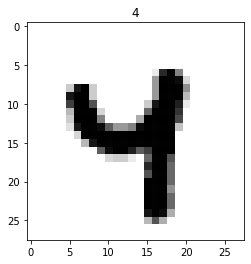

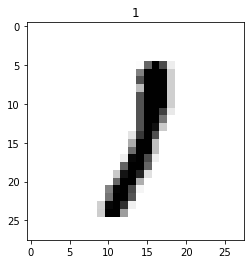

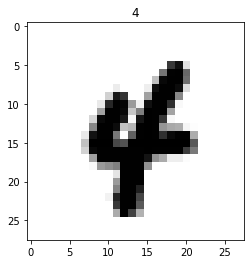

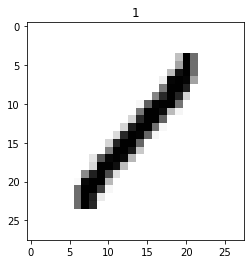

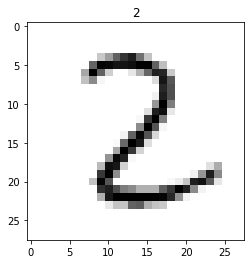

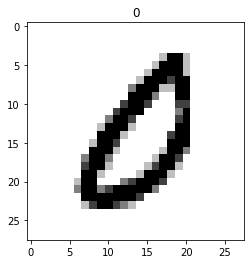

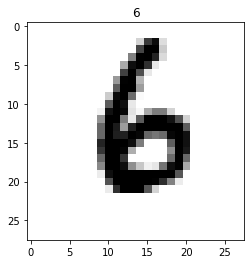

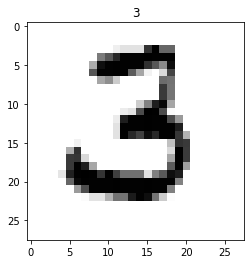

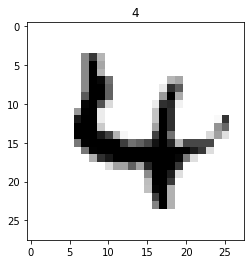

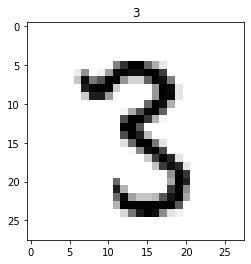

In [156]:
for i in range(10):
    plot_predict_img(i)